### Figure 1 (Molina, Gagne, and Prein; under review)

Fig 1. Thunderstorm objects for this study were extracted from areas east of the RockyMountains (over land) within the dashed-line polygon.  An example thunderstorm object is shown over the CONUS for scale, with the inset displaying a larger version, and corresponding state variables are shown on the right.  State variables listed from top-to-bottom are water vapor mixing ratio (qw; g kg−1), temperature (T; K), pressure (P; hPa), and zonal (u) and meridional (v)winds (m s−1).  The four layers for each state variable indicate the four levels (1, 3, 5, and 7 km above ground) at which variables were derived.

**Figure by Maria J. Molina (NCAR)**

### Visualizing map projection and storm objects (reflectivity and environments)

Imports.

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.feature as cf
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from metpy.plots import colortables
import geopandas
import matplotlib.patches as mpatches
import matplotlib
# import paths from config file
from configpaths import shapefile_path, current_stormpath, figsave_path, dlproj_main

Create United States polygon.

In [2]:
proj = ccrs.LambertConformal(central_latitude = 35, 
                             central_longitude = 260, 
                             standard_parallels = (25, 25))

df = geopandas.read_file(f'{shapefile_path}/ne_50m_admin_0_countries.shp')
poly = df.loc[df['ADMIN'] == 'United States of America']['geometry'].values[0]

Create map projection and state/county data for plotting using shapefiles.

In [3]:
proj = ccrs.LambertConformal(central_latitude = 25, 
                             central_longitude = 265, 
                             standard_parallels = (25, 25))

reader = shpreader.Reader(f'{shapefile_path}/ne_50m_admin_1_states_provinces_lines.shp')
states = list(reader.geometries())
STATES = cfeature.ShapelyFeature(states, ccrs.PlateCarree())

reader = shpreader.Reader(f'{shapefile_path}/countyl010g.shp')
counties = list(reader.geometries())
COUNTIES = cfeature.ShapelyFeature(counties, ccrs.PlateCarree())

Quick visualization of a storm's dbz.

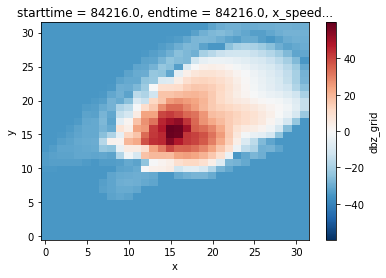

In [4]:
data = xr.open_dataset(f'{current_stormpath}/current_SP3hourly_20100511.nc')
data.dbz_grid[6,:,:].plot()

Visualization of a storm using filled contours, map projection, and reflectivity colormap.

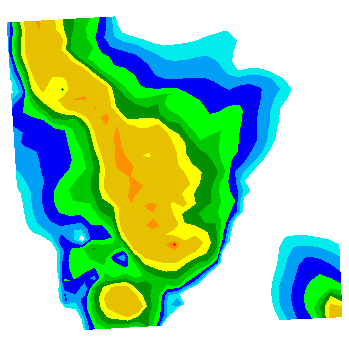

In [6]:
data = xr.open_dataset(f'{current_stormpath}/current_SP3hourly_20100511.nc')

levels=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]
cmap = colortables.get_colortable('NWSReflectivity')

indx=50

fig = plt.figure(figsize=(6.,6))
ax = plt.axes()

fig.patch.set_visible(False)
ax.axis('off')

cs = ax.contourf(data.lons[indx,:,:], data.lats[indx,:,:], 
                 data.dbz_grid[indx,:,:], 
                 levels=levels, cmap=cmap)#, transform = ccrs.PlateCarree())
#ax.set_extent([-100, -98.5, 31.25, 32.15], crs=ccrs.PlateCarree())
#plt.savefig(f'{figsave_path}/mcs_interp_10.png', bbox_inches='tight', dpi=500, transparent=True)
plt.show()

Additional visualization of a storm using filled contours, map projection, county information, and reflectivity colormap.

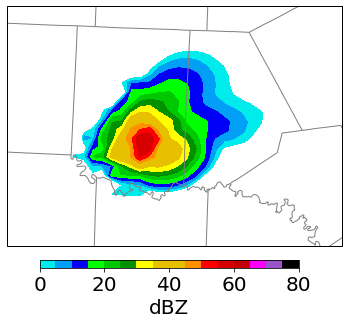

In [7]:
fig = plt.figure(figsize=(6.,6))
ax = plt.axes(projection = proj)
ax.add_feature(STATES, facecolor='none', edgecolor='k', zorder=30)
cs = ax.contourf(data.lons[6,:,:], data.lats[6,:,:], data.dbz_grid[6,:,:], levels=levels, cmap=cmap, transform = ccrs.PlateCarree())
ax.coastlines('50m')
ax.add_feature(cf.BORDERS)
ax.add_feature(COUNTIES, facecolor='none', edgecolor='gray')
ax.set_extent([-100, -98.5, 31.25, 32.15], crs=ccrs.PlateCarree())
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.0175])
tickss = [0,20,40,60,80]
cbar = fig.colorbar(cs, ticks=tickss, cax=cbar_ax, orientation="horizontal", extend='both')
cbar.ax.set_xticklabels(['0','20','40','60','80'])
cbar.ax.tick_params(labelsize=20)
cbar.set_label('dBZ', fontsize=20)
plt.show()

General visualization of map projection.

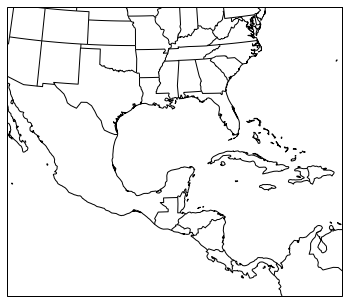

In [8]:
fig = plt.figure(figsize=(6.,6))
ax = plt.axes(projection = proj)
ax.add_feature(STATES, facecolor='none', edgecolor='k', zorder=30)
ax.coastlines('50m')
ax.add_feature(cf.BORDERS)
ax.set_extent([-110, -70., 5., 40.], crs=ccrs.PlateCarree())
plt.show()

Import storm environment patch data to import into figure.

In [9]:
data_q = xr.open_dataset(f'{current_stormpath}/current_SP3hourly_qvapor_20100511.nc')
data_p = xr.open_dataset(f'{current_stormpath}/current_SP3hourly_p_20100511.nc')
data_t = xr.open_dataset(f'{current_stormpath}/current_SP3hourly_tk_20100511.nc')
data_v = xr.open_dataset(f'{current_stormpath}/current_SP3hourly_ev_20100511.nc')
data_u = xr.open_dataset(f'{current_stormpath}/current_SP3hourly_eu_20100511.nc')

### Creation figure 1

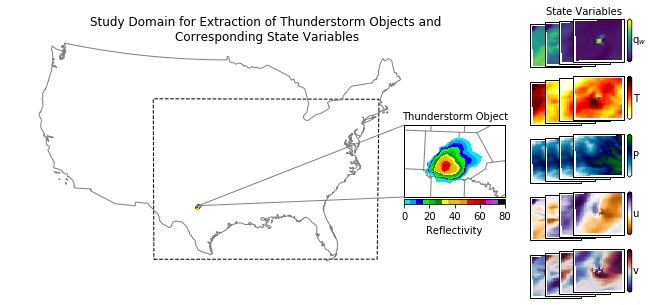

In [11]:
#--------------------

levels=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]
cmap = colortables.get_colortable('NWSReflectivity')

#--------------------

fig = plt.figure(figsize=(8.,4.))

fig.suptitle('Study Domain for Extraction of Thunderstorm Objects and \nCorresponding State Variables', fontsize=12)

#--------------------STUDY DOMAIN

ax1 = fig.add_axes([0., 0.125, 0.8, 0.8], projection=proj)

ax1.add_geometries(poly, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='0.5', lw=1.)
ax1.set_extent([-125, -70, 25, 50], crs=ccrs.PlateCarree())
ax1.outline_patch.set_visible(False)

ax1.contourf(data.lons[6,:,:], data.lats[6,:,:], data.dbz_grid[6,:,:], levels=levels, cmap=cmap, transform = ccrs.PlateCarree())

lon_corners = np.array([-105., -107., -71., -75.])
lat_corners = np.array([25., 44.22, 43., 24])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners

poly2 = mpatches.Polygon(poly_corners, closed=True, ec='k', fill=False, lw=1., ls='--', fc="yellow", transform=ccrs.Geodetic())
ax1.add_patch(poly2)

#--------------------STORM PATCH

ax2 = fig.add_axes([0.7, 0.35, 0.25, 0.25], projection=proj)

ax2.set_title('Thunderstorm Object',fontsize=10)

cs = ax2.contourf(data.lons[6,:,:], data.lats[6,:,:], data.dbz_grid[6,:,:], levels=levels, cmap=cmap, transform = ccrs.PlateCarree(), zorder=100)
ax2.add_feature(COUNTIES, facecolor='none', edgecolor='gray')
ax2.set_extent([-100, -98.5, 31.25, 32.15], crs=ccrs.PlateCarree())
#ax2.outline_patch.set_visible(False)

cbar_ax = fig.add_axes([0.7375, 0.325, 0.175, 0.0175])
tickss = [0,20,40,60,80]
cbar = fig.colorbar(cs, ticks=tickss, cax=cbar_ax, orientation="horizontal", extend='both')
cbar.ax.set_xticklabels(['0','20','40','60','80'])
cbar.ax.tick_params(labelsize=10)
cbar.set_label('Reflectivity', fontsize=10)


#--------------------QVAPOR

ax3 = fig.add_axes([0.925, 0.8, 0.15, 0.15], projection=proj)
cs = ax3.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_q.var_grid.values[6,0,:,:], cmap='viridis')
ax3.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

ax33 = fig.add_axes([0.95, 0.80625, 0.15, 0.15], projection=proj)
cs = ax33.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_q.var_grid.values[6,1,:,:], cmap='viridis')
ax33.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

ax333 = fig.add_axes([0.975, 0.8125, 0.15, 0.15], projection=proj)
ax333.set_title('State Variables', fontsize=10, ha='center')
cs = ax333.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_q.var_grid.values[6,2,:,:], cmap='viridis')
ax333.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

ax3333 = fig.add_axes([1., 0.81875, 0.15, 0.15], projection=proj)
cs = ax3333.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_q.var_grid.values[6,3,:,:], cmap='viridis')
ax3333.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

cbar_ax = fig.add_axes([1.125, 0.81875, 0.0075, 0.15])
cbar = fig.colorbar(cs, ticks=[], cax=cbar_ax, orientation="vertical", extend='both')
cbar.ax.tick_params(size=0)
cbar.set_label('  q$_{w}$', fontsize=10, rotation=0, va='center')


#--------------------T

ax4 = fig.add_axes([0.925, 0.6, 0.15, 0.15], projection=proj)
cs = ax4.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_t.var_grid.values[6,0,:,:], cmap='hot_r')
ax4.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

ax44 = fig.add_axes([0.95, 0.60625, 0.15, 0.15], projection=proj)
cs = ax44.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_t.var_grid.values[6,1,:,:], cmap='hot_r')
ax44.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

ax444 = fig.add_axes([0.975, 0.6125, 0.15, 0.15], projection=proj)
cs = ax444.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_t.var_grid.values[6,2,:,:], cmap='hot_r')
ax444.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

ax4444 = fig.add_axes([1.0, 0.61875, 0.15, 0.15], projection=proj)
cs = ax4444.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_t.var_grid.values[6,3,:,:], cmap='hot_r')
ax4444.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

cbar_ax = fig.add_axes([1.125, 0.61875, 0.0075, 0.15])
cbar = fig.colorbar(cs, ticks=[], cax=cbar_ax, orientation="vertical", extend='both')
cbar.ax.tick_params(size=0)
cbar.set_label('T', fontsize=10, rotation=0, va='center')


#--------------------P

ax5 = fig.add_axes([0.925, 0.4, 0.15, 0.15], projection=proj)
cs = ax5.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_p.var_grid.values[6,0,:,:], cmap='ocean_r')
ax5.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

ax55 = fig.add_axes([0.95, 0.40625, 0.15, 0.15], projection=proj)
cs = ax55.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_p.var_grid.values[6,1,:,:], cmap='ocean_r')
ax55.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

ax555 = fig.add_axes([0.975, 0.4125, 0.15, 0.15], projection=proj)
cs = ax555.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_p.var_grid.values[6,2,:,:], cmap='ocean_r')
ax555.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

ax5555 = fig.add_axes([1., 0.41875, 0.15, 0.15], projection=proj)
cs = ax5555.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_p.var_grid.values[6,3,:,:], cmap='ocean_r')
ax5555.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

cbar_ax = fig.add_axes([1.125, 0.41875, 0.0075, 0.15])
cbar = fig.colorbar(cs, ticks=[], cax=cbar_ax, orientation="vertical", extend='both')
cbar.ax.tick_params(size=0)
cbar.set_label('P', fontsize=10, rotation=0, va='center')

#--------------------

ax6 = fig.add_axes([0.925, 0.2, 0.15, 0.15], projection=proj)
cs = ax6.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_u.var_grid.values[6,0,:,:], cmap='PuOr')
ax6.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

ax66 = fig.add_axes([0.95, 0.20625, 0.15, 0.15], projection=proj)
cs = ax66.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_u.var_grid.values[6,1,:,:], cmap='PuOr')
ax66.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

ax666 = fig.add_axes([0.975, 0.2125, 0.15, 0.15], projection=proj)
cs = ax666.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_u.var_grid.values[6,2,:,:], cmap='PuOr')
ax666.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

ax6666 = fig.add_axes([1., 0.21875, 0.15, 0.15], projection=proj)
cs = ax6666.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_u.var_grid.values[6,3,:,:], cmap='PuOr')
ax6666.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

cbar_ax = fig.add_axes([1.125, 0.21875, 0.0075, 0.15])
cbar = fig.colorbar(cs, ticks=[], cax=cbar_ax, orientation="vertical", extend='both')
cbar.ax.tick_params(size=0)
cbar.set_label('u', fontsize=10, rotation=0, va='center')

#--------------------

ax7 = fig.add_axes([0.925, 0., 0.15, 0.15], projection=proj)
cs = ax7.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_v.var_grid.values[6,0,:,:], cmap='twilight_shifted')
ax7.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

ax77 = fig.add_axes([0.95, 0.00625, 0.15, 0.15], projection=proj)
cs = ax77.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_v.var_grid.values[6,1,:,:], cmap='twilight_shifted')
ax77.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

ax777 = fig.add_axes([0.975, 0.0125, 0.15, 0.15], projection=proj)
cs = ax777.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_v.var_grid.values[6,2,:,:], cmap='twilight_shifted')
ax777.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

ax7777 = fig.add_axes([1., 0.01875, 0.15, 0.15], projection=proj)
cs = ax7777.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_v.var_grid.values[6,3,:,:], cmap='twilight_shifted')
ax7777.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

cbar_ax = fig.add_axes([1.125, 0.01875, 0.0075, 0.15])
cbar = fig.colorbar(cs, ticks=[], cax=cbar_ax, orientation="vertical", extend='both')
cbar.ax.tick_params(size=0)
cbar.set_label('v', fontsize=10, rotation=0, va='center')

#--------------------

transFigure = fig.transFigure.inverted()
#x0,x1; y0,y1
line1 = matplotlib.lines.Line2D((0.38, 0.7375),
                                (0.32, 0.6), lw=1., c='0.5',
                                transform=fig.transFigure, figure=fig)

line2 = matplotlib.lines.Line2D((0.38, 0.7375),
                                (0.32, 0.35), lw=1., c='0.5',
                                transform=fig.transFigure, figure=fig)

fig.lines.extend([line1, line2])

#--------------------

plt.savefig(f'{figsave_path}/journal_fig1.png', bbox_inches='tight', dpi=500)
plt.show()

#--------------------

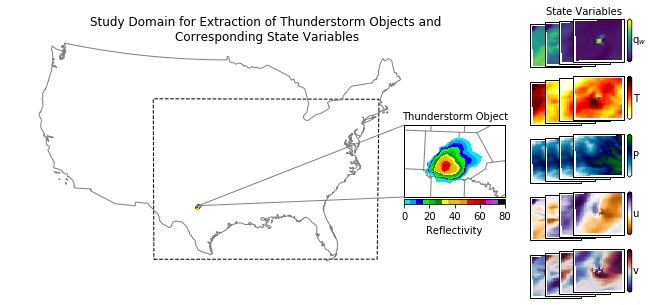

In [12]:
#--------------------

levels=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]
cmap = colortables.get_colortable('NWSReflectivity')

#--------------------

fig = plt.figure(figsize=(8.,4.))

fig.suptitle('Study Domain for Extraction of Thunderstorm Objects and \nCorresponding State Variables', fontsize=12)

#--------------------STUDY DOMAIN

ax1 = fig.add_axes([0., 0.125, 0.8, 0.8], projection=proj)

ax1.add_geometries(poly, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='0.5', lw=1.)
ax1.set_extent([-125, -70, 25, 50], crs=ccrs.PlateCarree())
ax1.outline_patch.set_visible(False)

ax1.contourf(data.lons[6,:,:], data.lats[6,:,:], data.dbz_grid[6,:,:], levels=levels, cmap=cmap, transform = ccrs.PlateCarree())

lon_corners = np.array([-105., -107., -71., -75.])
lat_corners = np.array([25., 44.22, 43., 24])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners

poly2 = mpatches.Polygon(poly_corners, closed=True, ec='k', fill=False, lw=1., ls='--', fc="yellow", transform=ccrs.Geodetic())
ax1.add_patch(poly2)

#--------------------STORM PATCH

ax2 = fig.add_axes([0.7, 0.35, 0.25, 0.25], projection=proj)

ax2.set_title('Thunderstorm Object',fontsize=10)

cs = ax2.contourf(data.lons[6,:,:], data.lats[6,:,:], data.dbz_grid[6,:,:], levels=levels, cmap=cmap, transform = ccrs.PlateCarree(), zorder=100)
ax2.add_feature(COUNTIES, facecolor='none', edgecolor='gray')
ax2.set_extent([-100, -98.5, 31.25, 32.15], crs=ccrs.PlateCarree())
#ax2.outline_patch.set_visible(False)

cbar_ax = fig.add_axes([0.7375, 0.325, 0.175, 0.0175])
tickss = [0,20,40,60,80]
cbar = fig.colorbar(cs, ticks=tickss, cax=cbar_ax, orientation="horizontal", extend='both')
cbar.ax.set_xticklabels(['0','20','40','60','80'])
cbar.ax.tick_params(labelsize=10)
cbar.set_label('Reflectivity', fontsize=10)


#--------------------QVAPOR

ax3 = fig.add_axes([0.925, 0.8, 0.15, 0.15], projection=proj)
cs = ax3.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_q.var_grid.values[6,0,:,:], cmap='viridis')
ax3.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

ax33 = fig.add_axes([0.95, 0.80625, 0.15, 0.15], projection=proj)
cs = ax33.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_q.var_grid.values[6,1,:,:], cmap='viridis')
ax33.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

ax333 = fig.add_axes([0.975, 0.8125, 0.15, 0.15], projection=proj)
ax333.set_title('State Variables', fontsize=10, ha='center')
cs = ax333.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_q.var_grid.values[6,2,:,:], cmap='viridis')
ax333.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

ax3333 = fig.add_axes([1., 0.81875, 0.15, 0.15], projection=proj)
cs = ax3333.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_q.var_grid.values[6,3,:,:], cmap='viridis')
ax3333.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

cbar_ax = fig.add_axes([1.125, 0.81875, 0.0075, 0.15])
cbar = fig.colorbar(cs, ticks=[], cax=cbar_ax, orientation="vertical", extend='both')
cbar.ax.tick_params(size=0)
cbar.set_label('  q$_{w}$', fontsize=10, rotation=0, va='center')


#--------------------T

ax4 = fig.add_axes([0.925, 0.6, 0.15, 0.15], projection=proj)
cs = ax4.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_t.var_grid.values[6,0,:,:], cmap='hot_r')
ax4.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

ax44 = fig.add_axes([0.95, 0.60625, 0.15, 0.15], projection=proj)
cs = ax44.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_t.var_grid.values[6,1,:,:], cmap='hot_r')
ax44.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

ax444 = fig.add_axes([0.975, 0.6125, 0.15, 0.15], projection=proj)
cs = ax444.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_t.var_grid.values[6,2,:,:], cmap='hot_r')
ax444.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

ax4444 = fig.add_axes([1.0, 0.61875, 0.15, 0.15], projection=proj)
cs = ax4444.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_t.var_grid.values[6,3,:,:], cmap='hot_r')
ax4444.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

cbar_ax = fig.add_axes([1.125, 0.61875, 0.0075, 0.15])
cbar = fig.colorbar(cs, ticks=[], cax=cbar_ax, orientation="vertical", extend='both')
cbar.ax.tick_params(size=0)
cbar.set_label('T', fontsize=10, rotation=0, va='center')


#--------------------P

ax5 = fig.add_axes([0.925, 0.4, 0.15, 0.15], projection=proj)
cs = ax5.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_p.var_grid.values[6,0,:,:], cmap='ocean_r')
ax5.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

ax55 = fig.add_axes([0.95, 0.40625, 0.15, 0.15], projection=proj)
cs = ax55.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_p.var_grid.values[6,1,:,:], cmap='ocean_r')
ax55.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

ax555 = fig.add_axes([0.975, 0.4125, 0.15, 0.15], projection=proj)
cs = ax555.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_p.var_grid.values[6,2,:,:], cmap='ocean_r')
ax555.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

ax5555 = fig.add_axes([1., 0.41875, 0.15, 0.15], projection=proj)
cs = ax5555.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_p.var_grid.values[6,3,:,:], cmap='ocean_r')
ax5555.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

cbar_ax = fig.add_axes([1.125, 0.41875, 0.0075, 0.15])
cbar = fig.colorbar(cs, ticks=[], cax=cbar_ax, orientation="vertical", extend='both')
cbar.ax.tick_params(size=0)
cbar.set_label('P', fontsize=10, rotation=0, va='center')

#--------------------

ax6 = fig.add_axes([0.925, 0.2, 0.15, 0.15], projection=proj)
cs = ax6.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_u.var_grid.values[6,0,:,:], cmap='PuOr')
ax6.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

ax66 = fig.add_axes([0.95, 0.20625, 0.15, 0.15], projection=proj)
cs = ax66.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_u.var_grid.values[6,1,:,:], cmap='PuOr')
ax66.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

ax666 = fig.add_axes([0.975, 0.2125, 0.15, 0.15], projection=proj)
cs = ax666.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_u.var_grid.values[6,2,:,:], cmap='PuOr')
ax666.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

ax6666 = fig.add_axes([1., 0.21875, 0.15, 0.15], projection=proj)
cs = ax6666.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_u.var_grid.values[6,3,:,:], cmap='PuOr')
ax6666.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

cbar_ax = fig.add_axes([1.125, 0.21875, 0.0075, 0.15])
cbar = fig.colorbar(cs, ticks=[], cax=cbar_ax, orientation="vertical", extend='both')
cbar.ax.tick_params(size=0)
cbar.set_label('u', fontsize=10, rotation=0, va='center')

#--------------------

ax7 = fig.add_axes([0.925, 0., 0.15, 0.15], projection=proj)
cs = ax7.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_v.var_grid.values[6,0,:,:], cmap='twilight_shifted')
ax7.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

ax77 = fig.add_axes([0.95, 0.00625, 0.15, 0.15], projection=proj)
cs = ax77.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_v.var_grid.values[6,1,:,:], cmap='twilight_shifted')
ax77.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

ax777 = fig.add_axes([0.975, 0.0125, 0.15, 0.15], projection=proj)
cs = ax777.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_v.var_grid.values[6,2,:,:], cmap='twilight_shifted')
ax777.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

ax7777 = fig.add_axes([1., 0.01875, 0.15, 0.15], projection=proj)
cs = ax7777.pcolormesh(data_q.lons[6,:,:], data_q.lats[6,:,:], data_v.var_grid.values[6,3,:,:], cmap='twilight_shifted')
ax7777.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

cbar_ax = fig.add_axes([1.125, 0.01875, 0.0075, 0.15])
cbar = fig.colorbar(cs, ticks=[], cax=cbar_ax, orientation="vertical", extend='both')
cbar.ax.tick_params(size=0)
cbar.set_label('v', fontsize=10, rotation=0, va='center')

#--------------------

transFigure = fig.transFigure.inverted()
#x0,x1; y0,y1
line1 = matplotlib.lines.Line2D((0.38, 0.7375),
                                (0.32, 0.6), lw=1., c='0.5',
                                transform=fig.transFigure, figure=fig)

line2 = matplotlib.lines.Line2D((0.38, 0.7375),
                                (0.32, 0.35), lw=1., c='0.5',
                                transform=fig.transFigure, figure=fig)

fig.lines.extend([line1, line2])

#--------------------

plt.savefig(f'{figsave_path}/journal_fig1.pdf', bbox_inches='tight', dpi=500)
plt.show()

#--------------------